# **BACKGROUND**

### ***New York City Taxi and Limousine Commission (TLC) Trip Record Data***

The New York City Taxi and Limousine Commission (TLC) oversees the operations of the city's various taxi and for-hire vehicle services. The NYC TLC Trip Record dataset provides comprehensive information about taxi trips in New York City, capturing various details such as pickup and dropoff times, locations, passenger counts, trip distances, fare amounts, and payment methods. This dataset is instrumental for analyzing taxi operations, passenger behavior, and fare structures.

# **Analysis Problem Statment And Objectives**


## **PROBLEM STATEMENT**
- Understand Trip Patterns: Analyze the distribution of trip distances, durations, and passenger counts to identify common patterns and outliers.
- Evaluate Payment Methods: Examine the frequency and distribution of different payment methods and their relationship to trip characteristics.
- Identify Peak Travel Times: Analyze the distribution of trips by hour of day and day of week, and Location

## **OBJECTIVE**
- Identify Operational Insights: Provide actionable insights to optimize taxi operations, improve passenger service, and enhance revenue management.

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.ticker as ticker
import plotly.express as px
from scipy import stats
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

This Datasets containing a Trip record of Taxi in New York City, In this data there's a total of 18 columns
1. VendorID: A code indicating the LPEP provider that provided the record.
    - 1 = Creative Mobile Technologies, LLC.
    - 2 = VeriFone Inc.
2. lpep_pickup_datetime: The date and time when the meter was engaged.
3. lpep_dropoff_datetime: The date and time when the meter was disengaged.
4. Passenger_count: The number of passengers in the vehicle. This is a driver-entered value.
5. Trip_distance: The elapsed trip distance in miles reported by the taximeter.
6. PULocationID: TLC Taxi Zone in which the taximeter was engaged.
7. DOLocationID: TLC Taxi Zone in which the taximeter was disengaged.
8. RateCodeID: The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride
9. Store_and_fwd_flag: Indicates whether the trip record was held in the vehicle memory before sending to the vendor.
    - Y = store and forward trip
    - N = not a store and forward trip
10. Payment_type: A numeric code signifying how the passenger paid for the trip.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip
11. Fare_amount: The time-and-distance fare calculated by the meter.
12. Extra: Miscellaneous extras and surcharges (e.g., $0.50 and $1 rush hour and overnight charges).
13. MTA_tax: $0.50 MTA tax automatically triggered based on the metered rate in use.
14. Improvement_surcharge: $0.30 improvement surcharge assessed on hailed trips at the flag drop.
15. Tip_amount: Automatically populated for credit card tips (cash tips are not included).
16. Tolls_amount: Total amount of all tolls paid in the trip.
17. Total_amount: Total amount charged to passengers (does not include cash tips).
18. Trip_type: Indicates whether the trip was a street hail or a dispatch.
    - 1 = Street-hail
    - 2 = Dispatch

In [461]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## **Data Understanding and Cleaning**

In [462]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [463]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [464]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

Secara umum, kita bisa melihat bahwa:
* dataset NYC TLC Trip Record memiliki 19 kolom dan 68.211 baris
* beberapa kolom, yaitu, `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type` dan `congestion_surcharge` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.


## **Missing Value**


In [465]:
df.isna().sum()/len(df)*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

<Axes: >

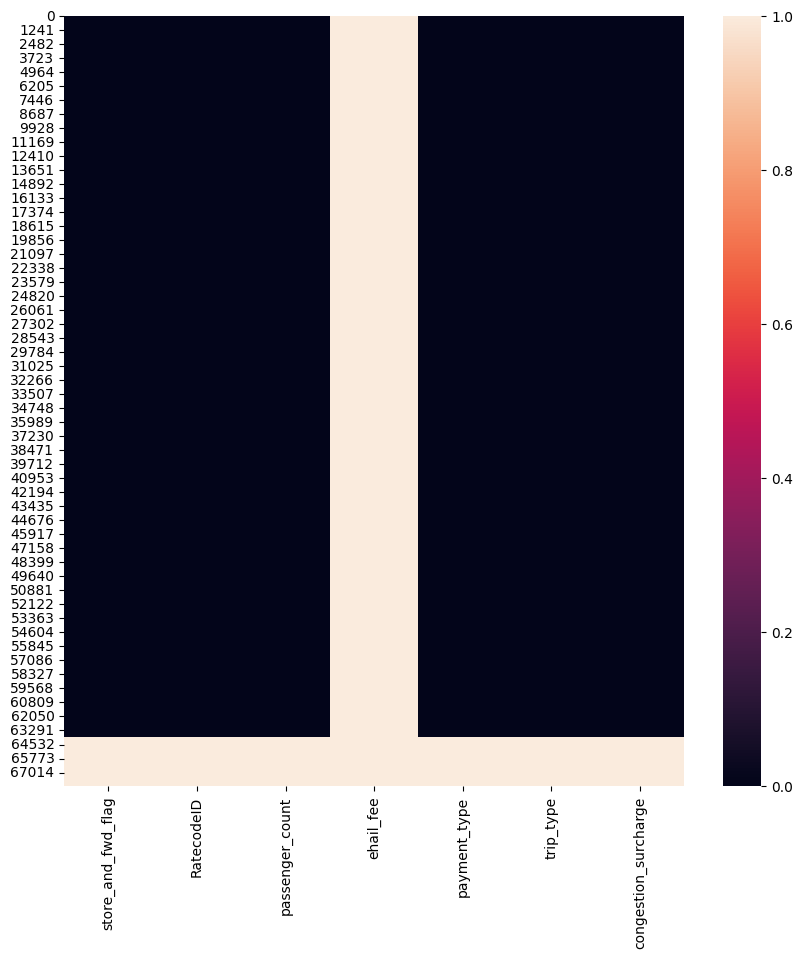

In [466]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

We can see that the missing value for `ehail_type` has a very high rate of missing value that reach 100%. while the rest still having a decent amount of missing value of <10%

## **DATA CLEANING**

In [467]:
df.drop(columns=['ehail_fee'], inplace=True)

implement Dropping to `ehail_fee` because the missing value has the amount of 100% which means this column does not indicate any value or connection to other column

In [468]:
# Mengonversi kolom datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

Converting the datetime column object into a datetime type for `lpep_pickup_datetime` and `lpep_dropoff_datetime`

In [469]:
df[df['fare_amount'] >= 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [470]:
columns_to_impute = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']
for column in columns_to_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

This ensures that all missing values in these specified columns are replaced with the most common value in each respective column. This is a common technique to handle missing data, especially for categorical variables.

In [471]:
df.dropna()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


**Dropping all missing value if there's still some available**

In [472]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

## **CLEANED DATA**

In [475]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(68211, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,66575,"[2023-01-12T18:17:41.000000000, 2023-01-30T20:21:01.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,66519,"[2023-01-10T11:25:38.000000000, 2023-01-20T09:09:01.000000000]"
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,float64,0,6,"[1.0, 2.0]"
5,PULocationID,int64,0,226,"[1, 168]"
6,DOLocationID,int64,0,249,"[128, 179]"
7,passenger_count,float64,0,10,"[6.0, 3.0]"
8,trip_distance,float64,0,1870,"[0.36, 14.8]"
9,fare_amount,float64,0,2553,"[82.8, 32.25]"


## **DECRIPTIVE ANALYSIS**

In [476]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 3600

In [477]:
descriptive_stats = df[['trip_distance', 'trip_duration', 'passenger_count']].describe()
print(descriptive_stats)

       trip_distance  trip_duration  passenger_count
count  68211.000000   68211.000000   68211.000000   
mean   8.114852       0.301621       1.295847       
std    585.105955     1.248761       0.950635       
min    0.000000       0.000000       0.000000       
25%    1.110000       0.120278       1.000000       
50%    1.850000       0.190000       1.000000       
75%    3.210000       0.291389       1.000000       
max    120098.840000  23.998056      9.000000       


# **DATA ANALYSIS**

**TOTAL TRIP PER VENDOR**

In [478]:
# Mengubah nama vendor
vendor_mapping = {
    1: 'Creative Mobile Technologies, LLC.',
    2: 'VeriFone Inc.'
}
df['VendorName'] = df['VendorID'].map(vendor_mapping)

In [479]:
total_trips_per_vendor = df['VendorID'].value_counts().reset_index()
total_trips_per_vendor.columns = ['VendorID', 'Total Trips']
total_trips_per_vendor['VendorID'] = total_trips_per_vendor['VendorID'].map(vendor_mapping)


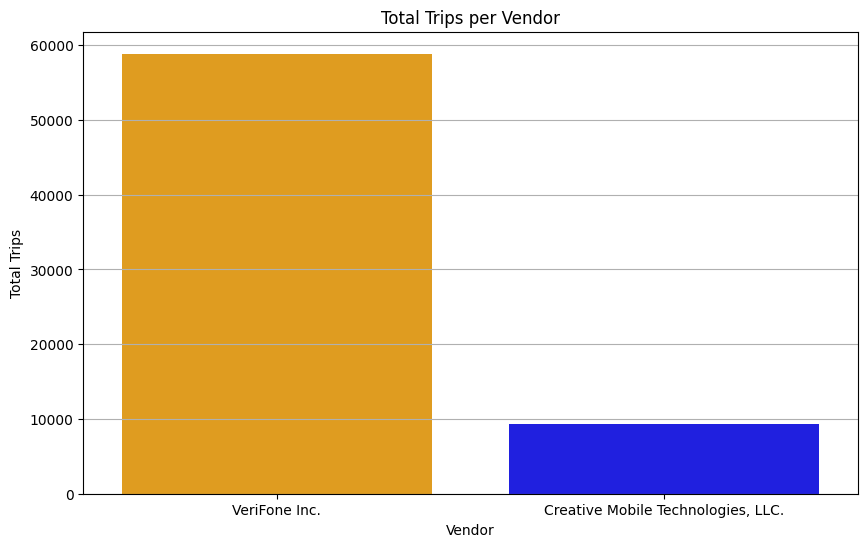

In [480]:
custom_palette = {
    'Creative Mobile Technologies, LLC.': 'blue',
    'VeriFone Inc.': 'orange'
}

plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='Total Trips', data=total_trips_per_vendor, palette=custom_palette)
plt.title('Total Trips per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Trips')
plt.grid(axis='y')
plt.show()

# **Insight:**
- VeriFone Inc Creative Mobile Technologies, LLC. handles a higher number of trips compared to Creative Mobile Technologies, LLC. This could be due to better market penetration or more extensive partnerships with taxi fleets.
# **Actionable Steps:**
- Creative Mobile Technologies, LLC. could analyze the strategies used by VeriFone Inc. to increase their trip volume, such as expanding partnerships or improving service offerings.

**TOTAL REVENUE PER VENDOR**

In [481]:
df['total_revenue'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Calculate total revenue per vendor
total_revenue_per_vendor = df.groupby('VendorName')['total_revenue'].sum().reset_index()

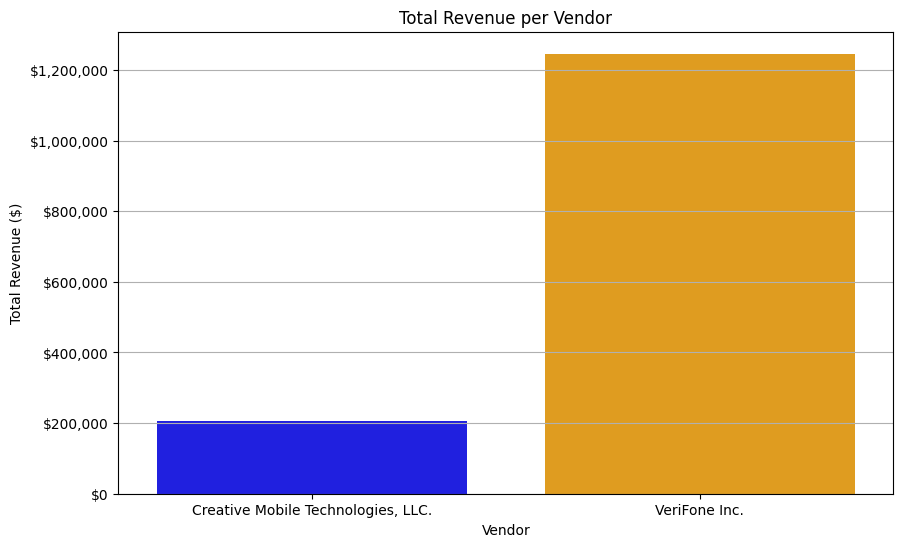

In [482]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorName', y='total_revenue', data=total_revenue_per_vendor, palette=custom_palette)
plt.title('Total Revenue per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Revenue ($)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.grid(axis='y')

plt.show()


# **Insight:**
- VeriFone Inc. generates a comparable total revenue to Creative Mobile Technologies, LLC. This suggests that VeriFone’s trips may have higher average fares or additional revenue streams.
# **Actionable Steps:** 
- Both vendors should examine the factors contributing to VeriFone’s higher revenue per trip, such as fare structures, surcharges, and tips, and consider optimizing these areas.


**AVERATE TRIP DISTANCE PER VENDOR**

In [483]:
average_trip_distance_per_vendor = df.groupby('VendorID')['trip_distance'].mean().reset_index()
average_trip_distance_per_vendor.columns = ['VendorID', 'trip_distance']
average_trip_distance_per_vendor['VendorID'] = average_trip_distance_per_vendor['VendorID'].map(vendor_mapping)

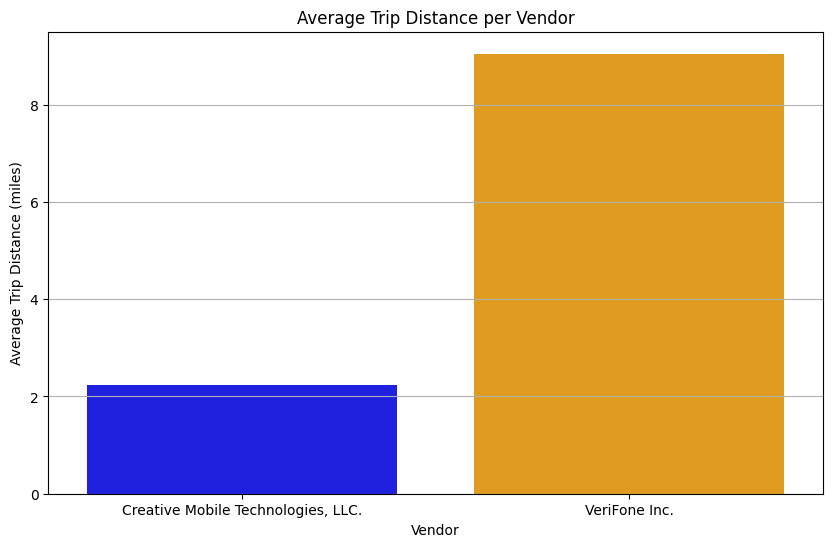

In [484]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='trip_distance', data=average_trip_distance_per_vendor, palette=custom_palette)
plt.title('Average Trip Distance per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Trip Distance (miles)')
plt.grid(axis='y')
plt.show()


# **Insight:** 
- The average trip distance for both vendors is similar, indicating a consistent service pattern. However, slight differences might be due to the geographic areas they serve or the nature of their partnerships.
# **Actionable Steps:** 
- Vendors should analyze trip patterns to identify high-demand areas and optimize their fleet distribution accordingly to maximize efficiency and coverage.

**AVERAGE TRIP DURATION PER VENDOR**

In [485]:
average_trip_duration_per_vendor = df.groupby('VendorID')['trip_duration'].mean().reset_index()
average_trip_duration_per_vendor.columns = ['VendorID', 'trip_duration']
average_trip_duration_per_vendor['VendorID'] = average_trip_duration_per_vendor['VendorID'].map(vendor_mapping)


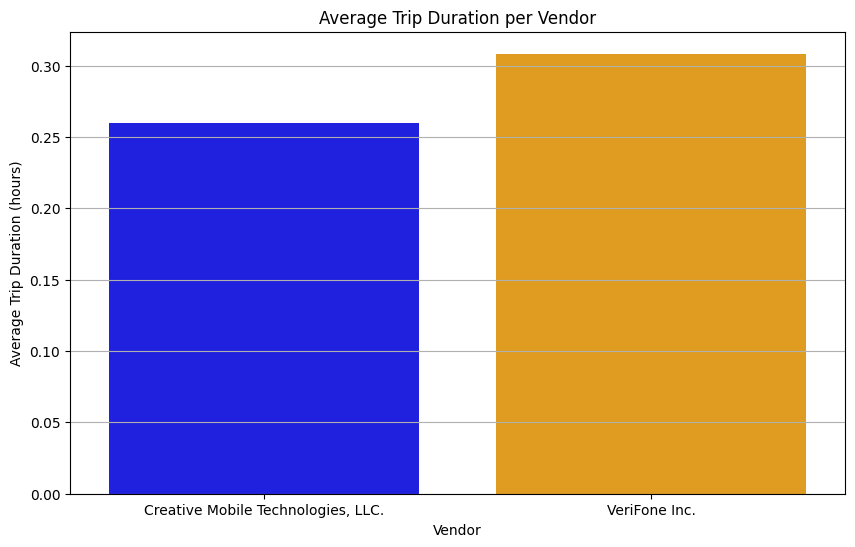

In [486]:
# Visualize average trip duration per vendor
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='trip_duration', data=average_trip_duration_per_vendor, palette=custom_palette)
plt.title('Average Trip Duration per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Trip Duration (hours)')
plt.grid(axis='y')
plt.show()

# **Insight:** 
- Similar to trip distances, the average trip duration for both vendors is comparable. This consistency suggests that both vendors are providing similar types of services and serving similar markets.
# **Actionable Steps:** 
- Explore ways to reduce trip duration without compromising service quality, such as improving route optimization and minimizing traffic delays.

**NUMBER OF TRIPS PER DAY OF THE WEEK**

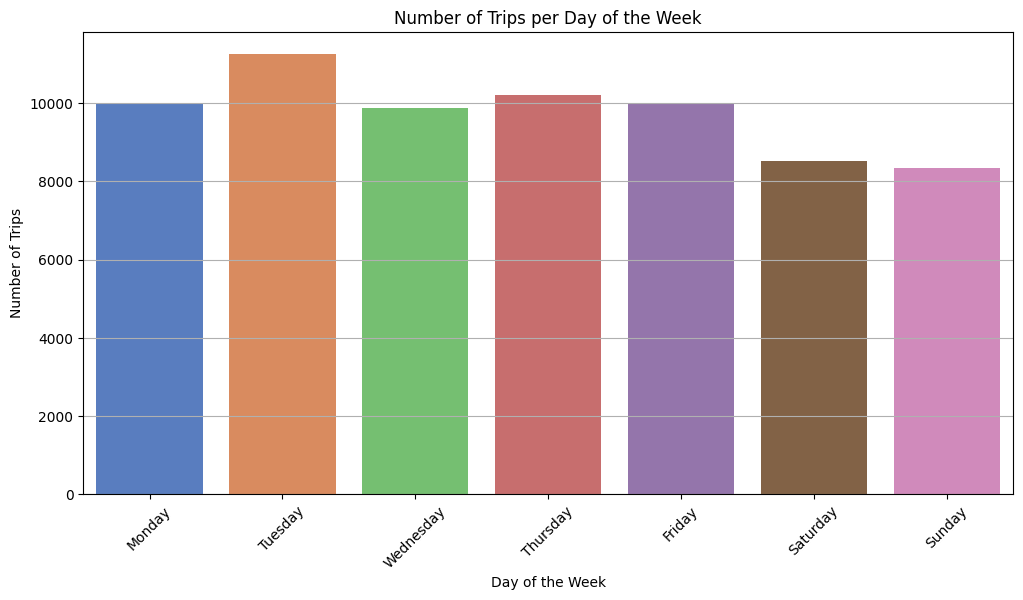

In [487]:
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()

# Calculate the number of trips per day
trips_per_day = df['pickup_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
trips_per_day.columns = ['Day', 'Total Trips']

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='Total Trips', data=trips_per_day, palette='muted')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **Insight:** 
- This Graph show number of trips daily for all vendors. we can see here that most of the weekend have a high demand of trips especially on tuesday. but show a slightly decreasing on weekend. even though it's not that significant. this could be an improvement to increase revenue


**DAILY PASSENGER COUNT**

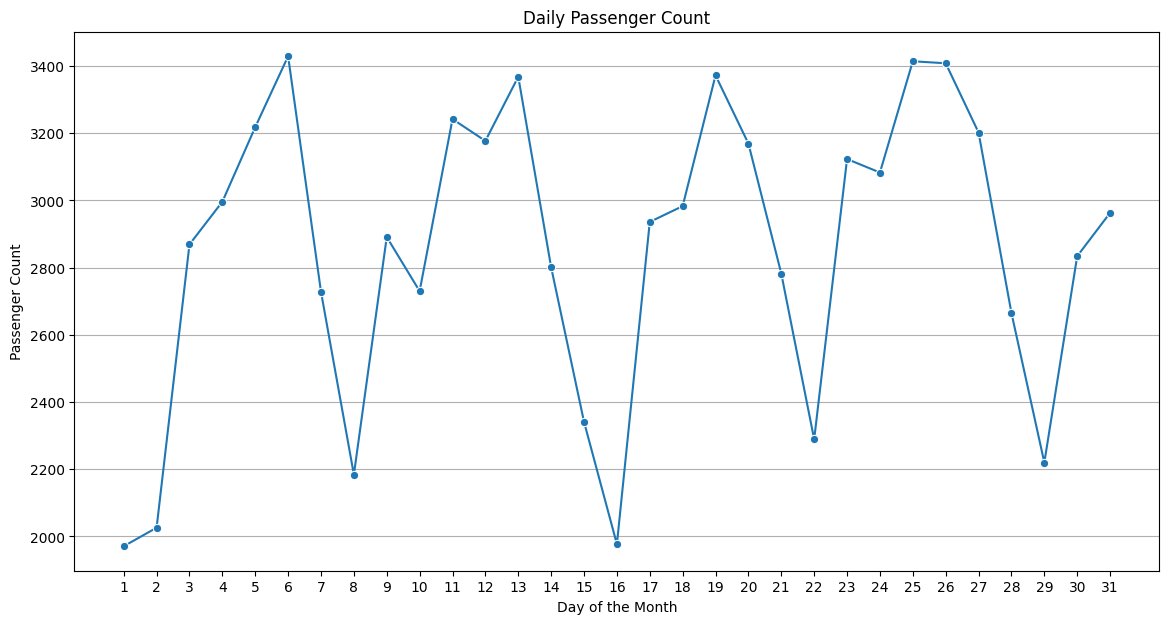

In [488]:
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day

# Calculate the total passenger count per day of the month
daily_passenger_count = df.groupby('pickup_day')['passenger_count'].sum().reset_index()
daily_passenger_count.columns = ['Day', 'Passenger Count']

# Create the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(x='Day', y='Passenger Count', data=daily_passenger_count, marker='o')
plt.title('Daily Passenger Count')
plt.xlabel('Day of the Month')
plt.ylabel('Passenger Count')
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.show()

# **Insight:** 
- This Graph show daily passanger count by day, or this graph show the trend of passenger day by day. as we can see there is highs and lows between days, the factor of this could possibly caused that on that date are majority weekend on the lows and weekdays on highs

**NUMBER OF TRIPS PER HOUR**

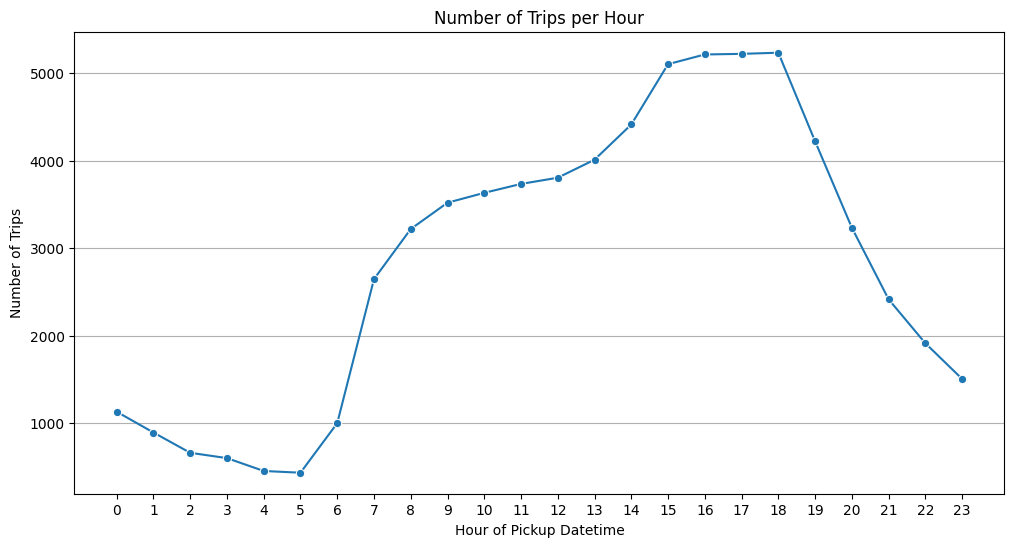

In [489]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Calculate the number of trips per hour
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='Total Trips')

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_per_hour, x='pickup_hour', y='Total Trips', marker='o')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Pickup Datetime')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

# **Insight:** 
- Number of trips per hour in the graph show the trend of trips demand hourly by day. as we can see the peak hour of time for the pickup is between 6AM - 20PM, and slowly decreasing until 5PM. the reason of the increase may be because of it's the peak time where people goes to work.

# Evaluate Payment Methods
- Examine the frequency and distribution of different payment methods and their relationship to trip characteristics.

In [490]:
payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
df['PaymentMethod'] = df['payment_type'].map(payment_mapping)

**Frequency and Distribution of Payment Methods**

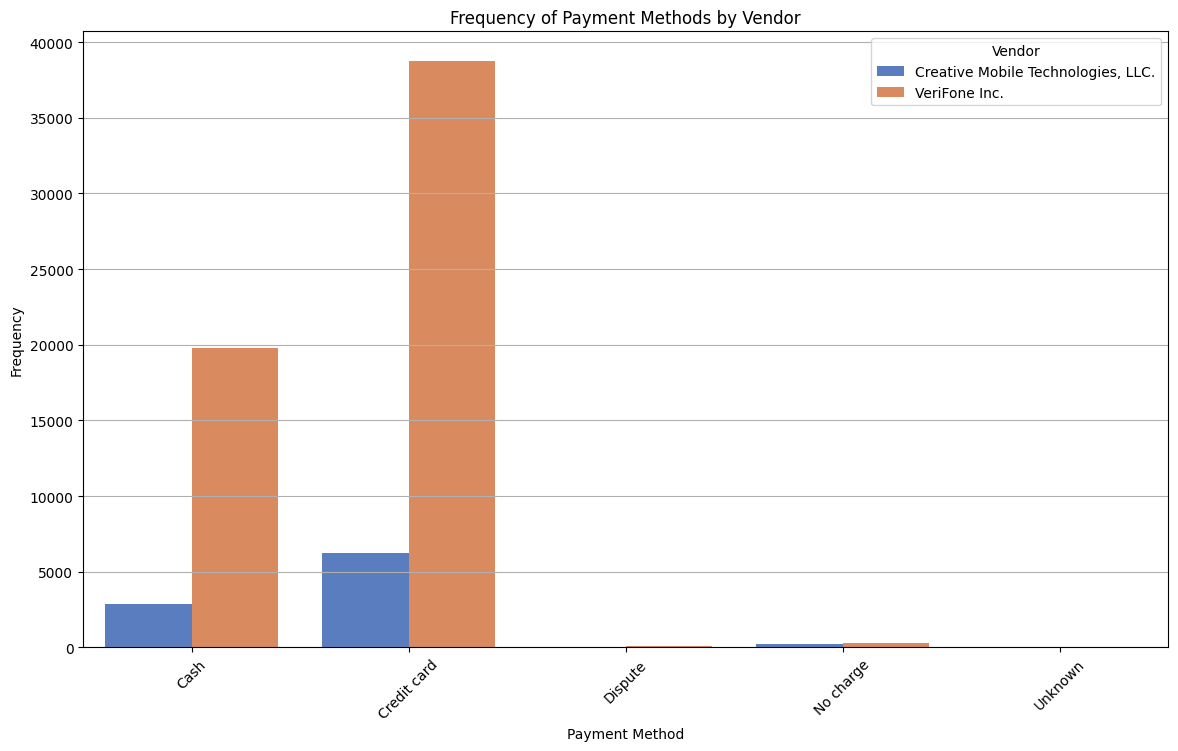

In [491]:
payment_method_counts = df.groupby(['PaymentMethod', 'VendorName']).size().reset_index(name='Frequency')

# Visualize the distribution of payment methods for each vendor
plt.figure(figsize=(14, 8))
sns.barplot(x='PaymentMethod', y='Frequency', hue='VendorName', data=payment_method_counts, palette='muted')
plt.title('Frequency of Payment Methods by Vendor')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Vendor')
plt.show()

# **Insight:** 
- Credit card payments are the most common method for both vendors, followed by cash payments. This indicates a preference for electronic payments among passengers.
# **Actionable Steps:** 
- Enhance the electronic payment experience by ensuring reliability and security. Consider offering incentives for cashless payments to further reduce handling costs and improve transaction efficiency.

**TOTAL REVENUE PER PAYMENT METHOD BY VENDOR**

In [492]:
df['total_revenue'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Calculate total revenue per payment method by vendor
total_revenue_per_payment_vendor = df.groupby(['PaymentMethod', 'VendorName'])['total_revenue'].sum().reset_index()

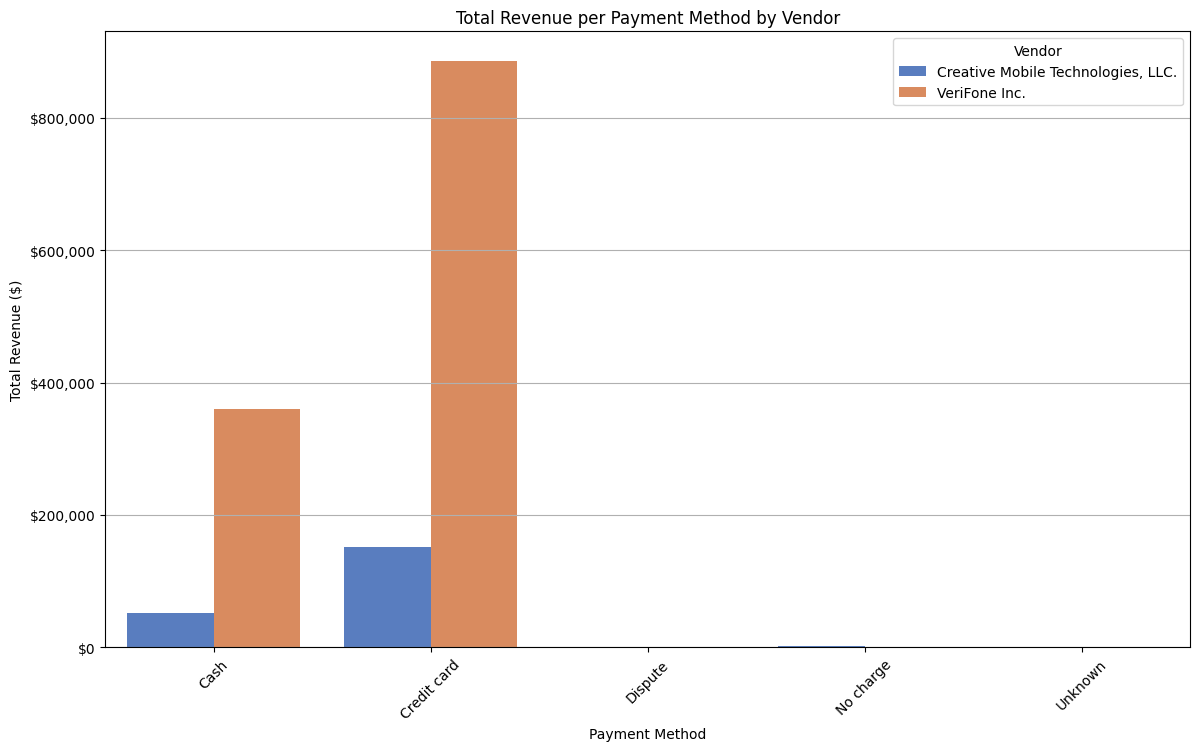

In [493]:
plt.figure(figsize=(14, 8))
sns.barplot(x='PaymentMethod', y='total_revenue', hue='VendorName', data=total_revenue_per_payment_vendor, palette='muted')
plt.title('Total Revenue per Payment Method by Vendor')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.legend(title='Vendor')
plt.show()

# **Insight:** 
- Both vendors generate significant revenue from credit card payments, with VeriFone Inc. showing a slightly higher revenue from this method. This could be due to higher tips or fare amounts associated with credit card transactions.
# **Actionable Steps:** 
- Focus on improving the credit card payment experience, such as offering loyalty programs or discounts for frequent users. Analyze and optimize the fare structures and tip suggestions to maximize revenue.

**Average Trip Distance by Payment Method and Vendor**

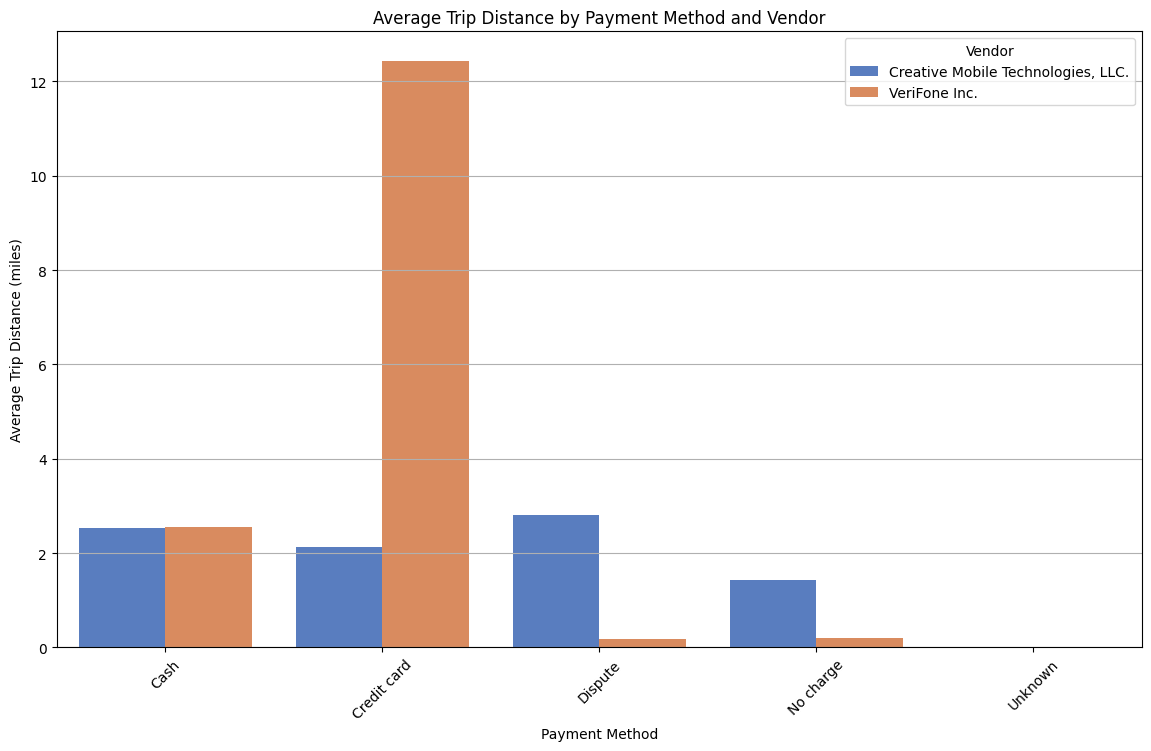

In [494]:
average_trip_distance_by_payment_vendor = df.groupby(['PaymentMethod', 'VendorName'])['trip_distance'].mean().reset_index()

# Visualize the average trip distance for each payment method per vendor
plt.figure(figsize=(14, 8))
sns.barplot(x='PaymentMethod', y='trip_distance', hue='VendorName', data=average_trip_distance_by_payment_vendor, palette='muted')
plt.title('Average Trip Distance by Payment Method and Vendor')
plt.xlabel('Payment Method')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Vendor')
plt.show()


# **Insight:** 
- Both vendors generate significant revenue from credit card payments, with VeriFone Inc. showing a slightly higher revenue from this method. This could be due to higher tips or fare amounts associated with credit card transactions.
# **Actionable Steps:** 
- Focus on improving the credit card payment experience, such as offering loyalty programs or discounts for frequent users. Analyze and optimize the fare structures and tip suggestions to maximize revenue.

**Average Trip Duration by Payment Method and Vendor**

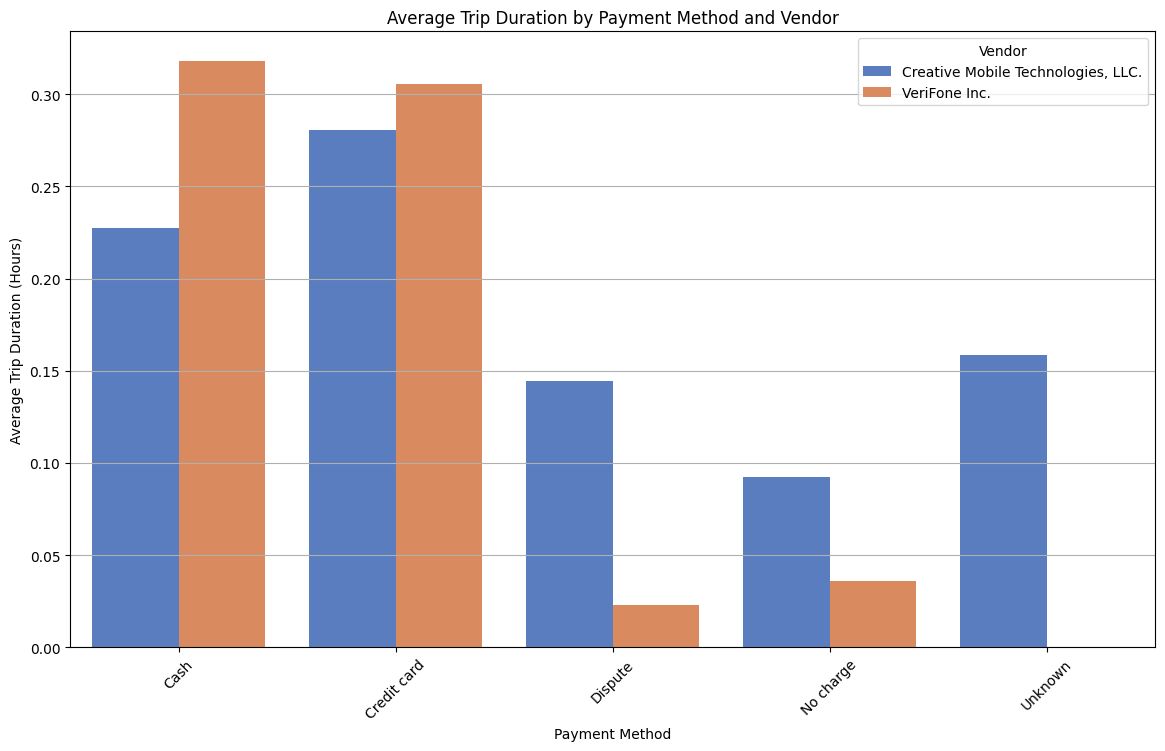

In [495]:

average_trip_duration_by_payment_vendor = df.groupby(['PaymentMethod', 'VendorName'])['trip_duration'].mean().reset_index()

# Visualize the average trip duration for each payment method per vendor
plt.figure(figsize=(14, 8))
sns.barplot(x='PaymentMethod', y='trip_duration', hue='VendorName', data=average_trip_duration_by_payment_vendor, palette='muted')
plt.title('Average Trip Duration by Payment Method and Vendor')
plt.xlabel('Payment Method')
plt.ylabel('Average Trip Duration (Hours)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Vendor')
plt.show()

# **Insight:** 
- The average trip duration does not vary significantly across payment methods, reinforcing the consistency in service provided by both vendors.
# **Actionable Steps:** 
- Maintain this consistency by continuously monitoring and optimizing trip durations, regardless of the payment method used.

**Assess Fare Structures: Investigate how different fare components (e.g., base fare, extras, tips) contribute to the total fare and their variations across trips.**

In [496]:
df['total_fare'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

# Calculate the proportion of each fare component
df['base_fare_proportion'] = df['fare_amount'] / df['total_fare']
df['extra_proportion'] = df['extra'] / df['total_fare']
df['mta_tax_proportion'] = df['mta_tax'] / df['total_fare']
df['tip_proportion'] = df['tip_amount'] / df['total_fare']
df['tolls_proportion'] = df['tolls_amount'] / df['total_fare']
df['improvement_surcharge_proportion'] = df['improvement_surcharge'] / df['total_fare']


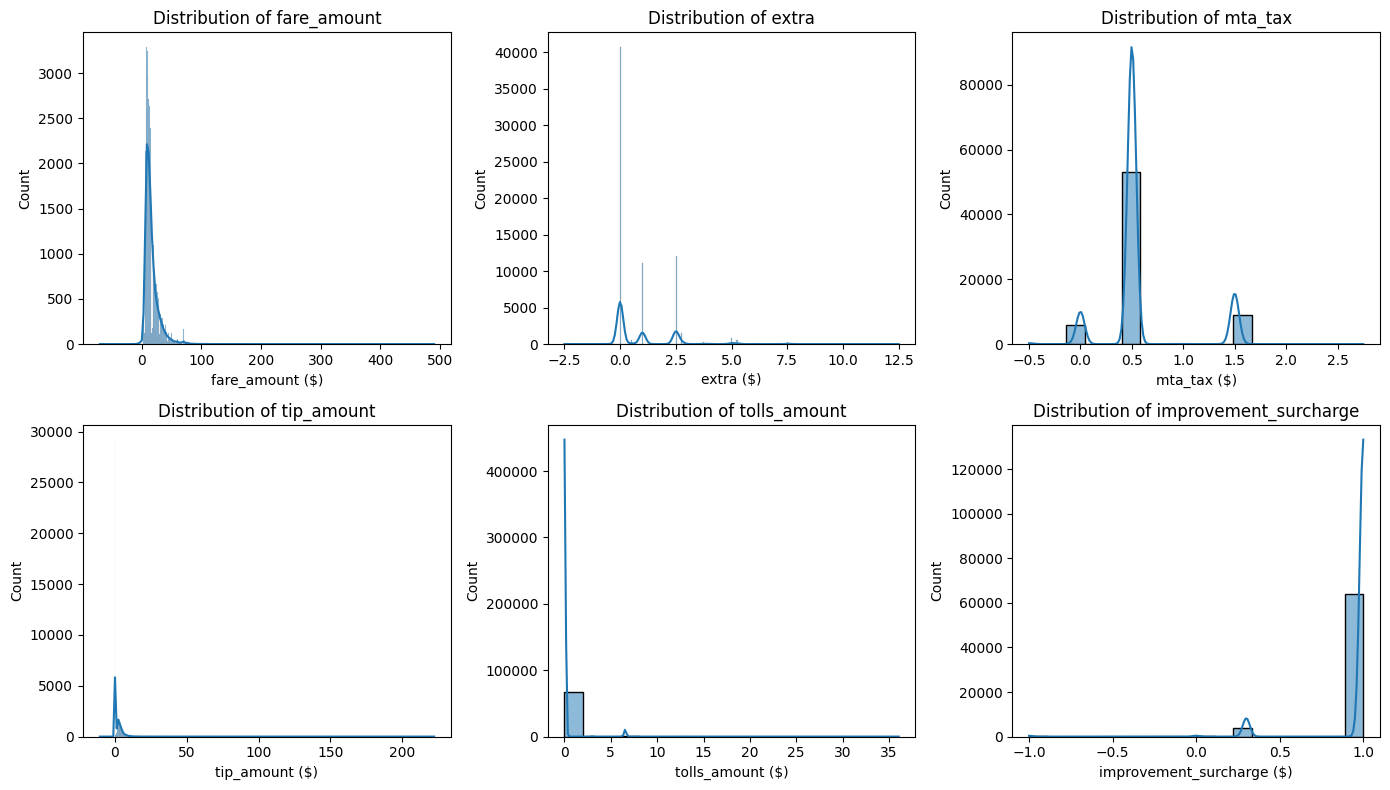

In [497]:
components = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
plt.figure(figsize=(14, 8))
for i, component in enumerate(components, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[component], kde=True)
    plt.title(f'Distribution of {component}')
    plt.xlabel(f'{component} ($)')
plt.tight_layout()
plt.show()

The distribution plots of fare components reveal that most taxi trips in NYC have relatively low fare amounts and minimal extra charges. Standard surcharges like the MTA tax and improvement surcharge are consistently applied, while tips and tolls show more variability. 

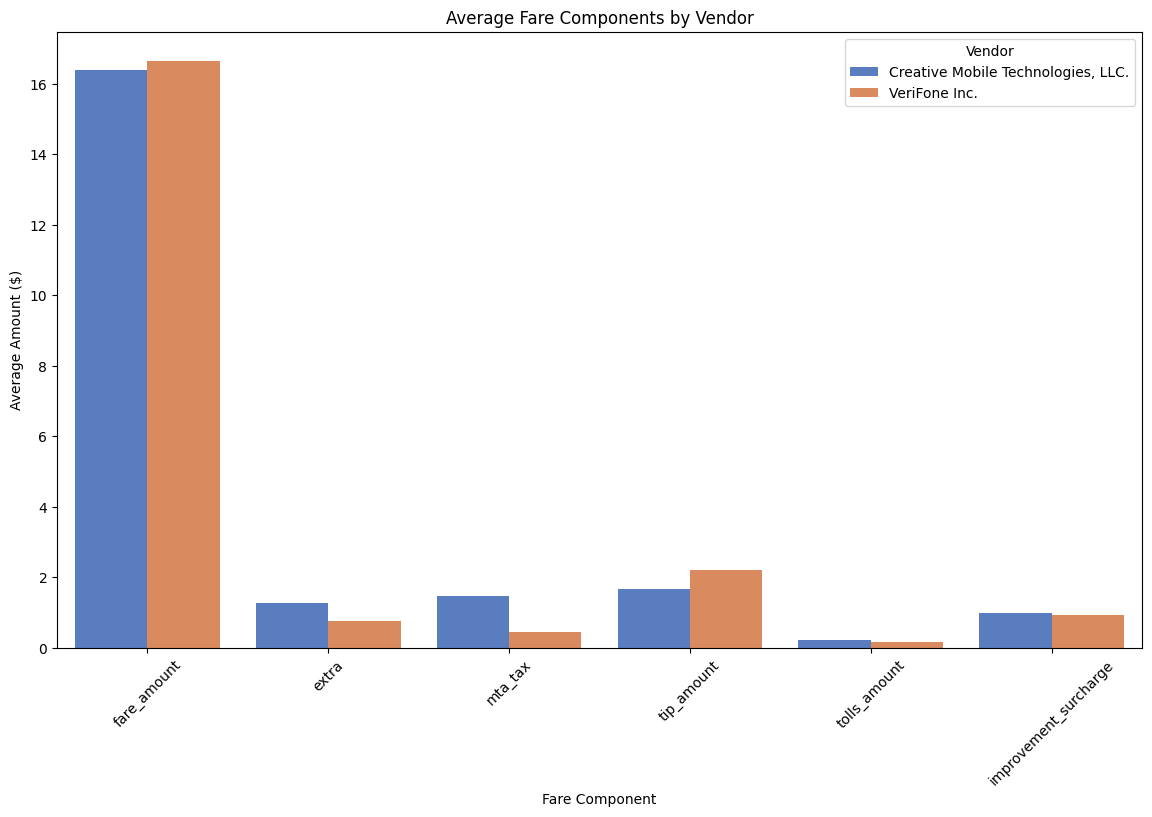

In [498]:
average_fare_components_by_vendor = df.groupby('VendorName')[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].mean().reset_index()

# Melt the dataframe for easier plotting
melted_fare_components = average_fare_components_by_vendor.melt(id_vars='VendorName', var_name='FareComponent', value_name='AverageAmount')

# Plot average fare components by vendor
plt.figure(figsize=(14, 8))
sns.barplot(x='FareComponent', y='AverageAmount', hue='VendorName', data=melted_fare_components, palette='muted')
plt.title('Average Fare Components by Vendor')
plt.xlabel('Fare Component')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Vendor')
plt.show()

The primary takeaway from the chart is that the base fare constitutes the majority of the total fare for both vendors. While other components like extras, MTA tax, tips, tolls, and improvement surcharges vary slightly between the two vendors, these differences are relatively minor in comparison to the dominance of the base fare. This insight can help in understanding the cost structure of taxi rides and identifying areas where fare adjustments or policy changes might be made to improve service or operational efficiency.








**TOTAL TRIP PER PICKUP LOCATION PER VENDOR**

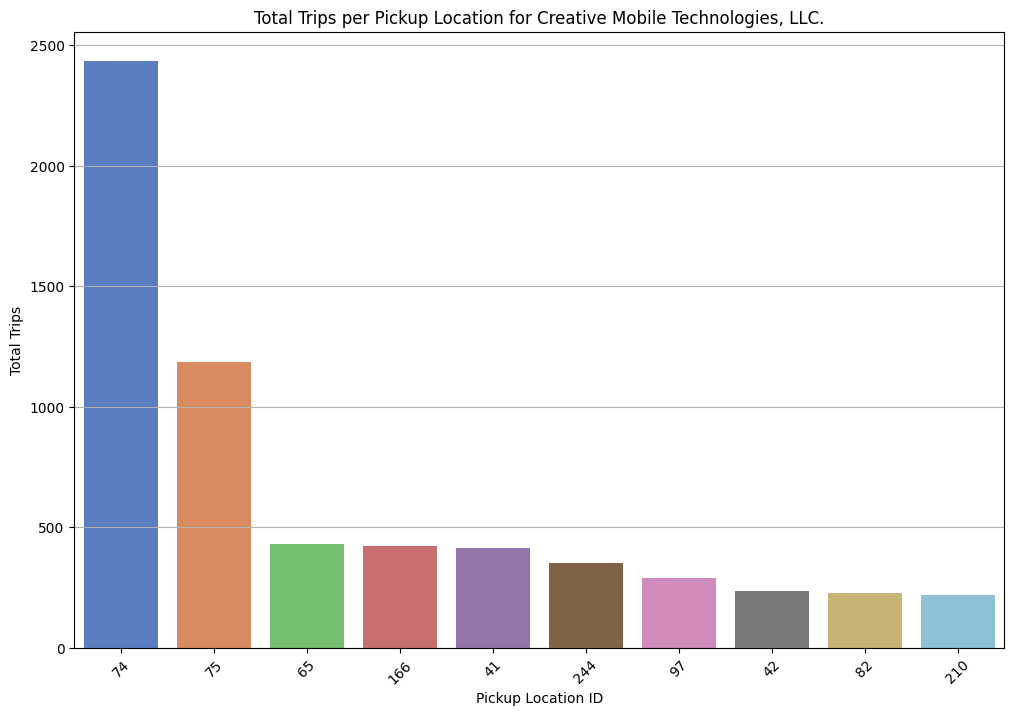

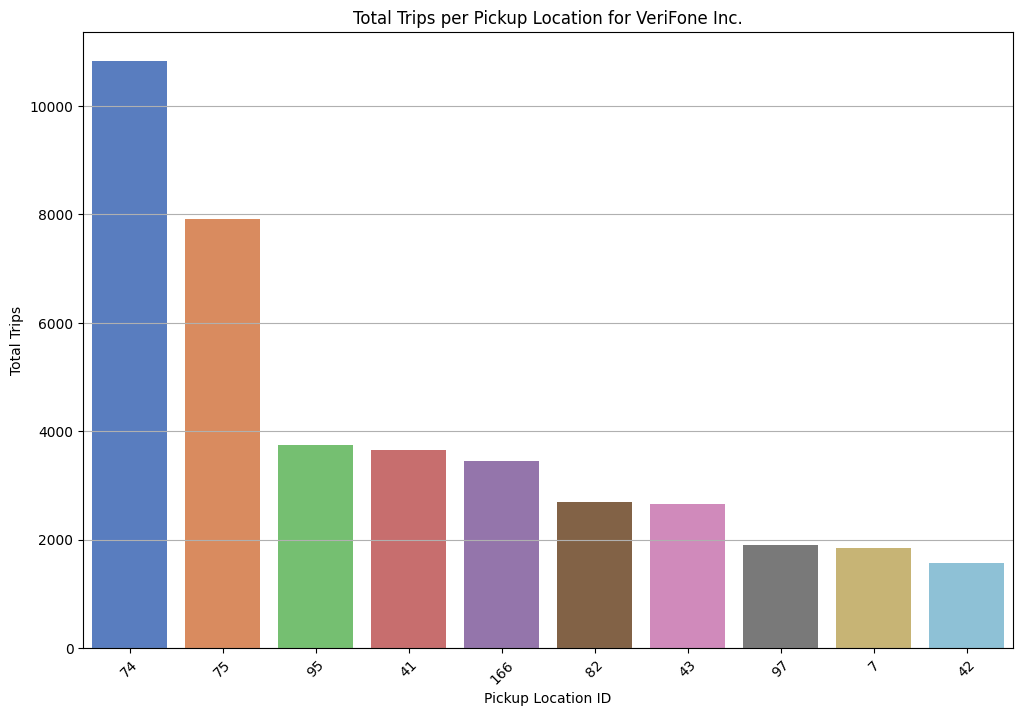

In [499]:
pickup_counts_per_vendor = df.groupby(['VendorName', 'PULocationID']).size().reset_index(name='Total Trips')

# Create bar plots for total trips per pickup location per vendor, sorted by highest to lowest
for vendor in pickup_counts_per_vendor['VendorName'].unique():
    vendor_data = pickup_counts_per_vendor[pickup_counts_per_vendor['VendorName'] == vendor]
    top_pickup_locations = vendor_data.sort_values(by='Total Trips', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='PULocationID', y='Total Trips', data=top_pickup_locations, palette='muted', order=top_pickup_locations['PULocationID'])
    plt.title(f'Total Trips per Pickup Location for {vendor}')
    plt.xlabel('Pickup Location ID')
    plt.ylabel('Total Trips')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# **Insight:** 
- Certain pickup locations have a significantly higher number of trips. This indicates high-demand areas that both vendors should focus on.
# **Actionable Steps:** 
- Ensure adequate vehicle availability in high-demand areas to reduce wait times and improve customer satisfaction. Implement dynamic pricing in these areas to manage demand and maximize revenue.

**TOTAL TRIP PER DROPOFF LOCATION PER VENDOR**

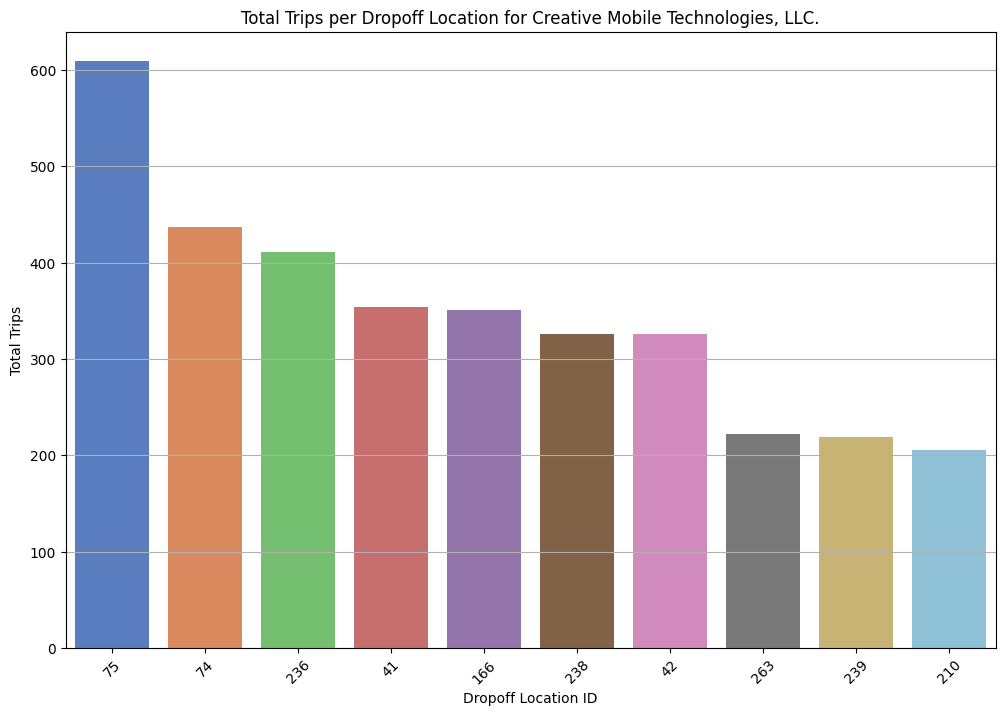

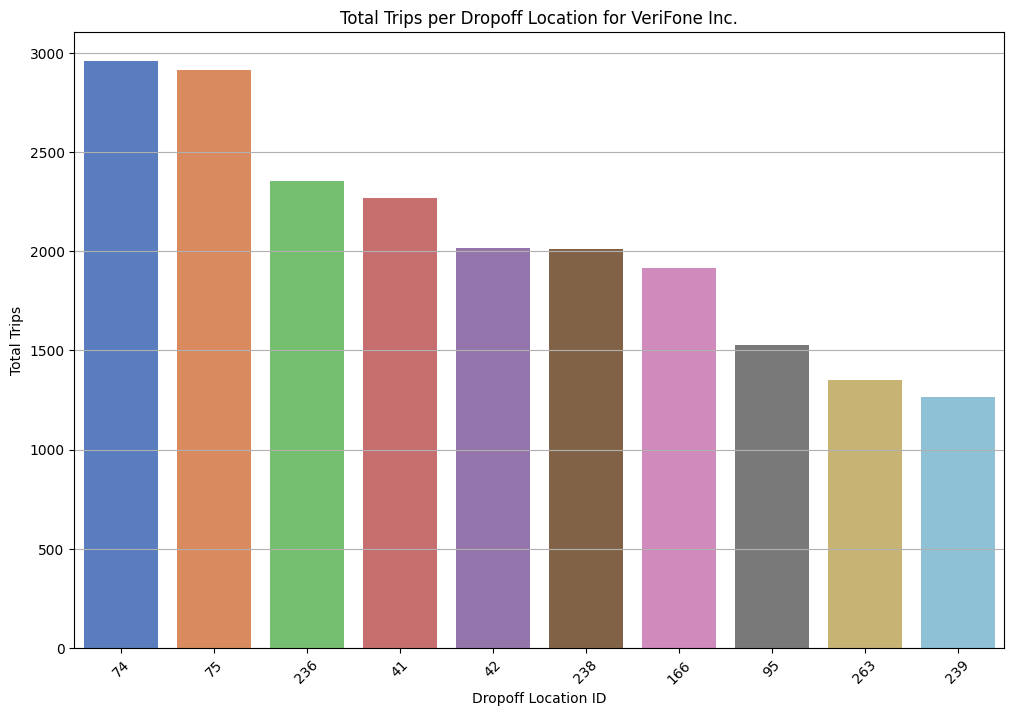

In [500]:
dropoff_counts_per_vendor = df.groupby(['VendorName', 'DOLocationID']).size().reset_index(name='Total Trips')

# Create bar plots for total trips per dropoff location per vendor, sorted by highest to lowest
for vendor in dropoff_counts_per_vendor['VendorName'].unique():
    vendor_data = dropoff_counts_per_vendor[dropoff_counts_per_vendor['VendorName'] == vendor]
    top_dropoff_locations = vendor_data.sort_values(by='Total Trips', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='DOLocationID', y='Total Trips', data=top_dropoff_locations, palette='muted', order=top_dropoff_locations['DOLocationID'])
    plt.title(f'Total Trips per Dropoff Location for {vendor}')
    plt.xlabel('Dropoff Location ID')
    plt.ylabel('Total Trips')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# **Insight:** 
- The distribution of dropoff locations mirrors the pickup locations, suggesting consistent travel patterns within the city.
# **Actionable Steps:** 
- Similar to pickup locations, ensure that vehicles are readily available in high-demand dropoff areas to facilitate quick turnarounds and increase trip frequency.
